In [19]:
import fabio
import numpy as np
import torch

img1 = fabio.open('/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0005.edf')
img1 = np.log(img1.data)
img2 = fabio.open('/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0009.edf')
img2 = np.log(img2.data)
img3 = fabio.open('/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0013.edf')
img3 = np.log(img3.data)
img11 = fabio.open('/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_15/Al_111_rockinglayer_15_0005.edf')
img11 = np.log(img11.data)

In [20]:
import random

def set_seed(seed=64):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    

set_seed(321)


In [21]:
import numpy as np
import fabio

def process_image(file_path):
    img = fabio.open(file_path)
    img_data = np.log(img.data)
    
    mean_intensity = np.mean(img_data)
    std_intensity = np.std(img_data)
    background_subtracted = img_data - (mean_intensity + std_intensity)
    
    background_subtracted[background_subtracted < 0] = 0
    
    # Normalize by max intensity
    max_intensity = np.max(background_subtracted)
    normalized_image = background_subtracted / max_intensity if max_intensity > 0 else background_subtracted
    
    return normalized_image

file_paths = [
    '/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0005.edf',
    '/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0009.edf',
    '/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_09/Al_111_rockinglayer_09_0013.edf'
]

# Process each image
#processed_images = [process_image(path) for path in file_paths]

# Return the first processed image to inspect
#img1,img2,img3= processed_images


In [22]:

#filename = "/data/projects/engage_id03/STO_indent_1down_rocking/scan0001/pco_ff_0000.h5"
#filename = '/data/projects/engage_id03/STO_indent_1down_weakbeam_zscan/scan0001/pco_ff_0000.h5'
filename ='/data/projects/engage_id03/Al_1050/Al_1050_10x_rockinglayers/scan0044/pco_ff_0000.h5' 
roi = []

with fabio.open_series(first_filename=filename) as series:
    for frame in series.frames():
        filtered_data = frame.data[970:1701, :] 
        #filtered_data = frame.data
        roi.append(filtered_data)
        frame_header = frame.header
        frame_index = frame.index
        file_index = frame.file_index
        file_name = frame.file_container.filename
im1= np.log(roi[13])
im11= np.log(roi[12])
im2= np.log(roi[14])
im21= np.log(roi[23])
im22= np.log(roi[24])
im3= np.log(roi[37]) 
im33= np.log(roi[38]) 


In [23]:
import numpy as np
from skimage.util import view_as_blocks

patch_size = (128,128)

def extract_patches(image, patch_size):
    patches = view_as_blocks(image, block_shape=patch_size)
    patches = patches.reshape(-1, patch_size[0], patch_size[1])  # Reshape into list of patches
    return patches

def crop_image_to_fit(image, patch_size):
    height, width = image.shape
    new_height = (height // patch_size[0]) * patch_size[0]
    new_width = (width // patch_size[1]) * patch_size[1]
    return image[:new_height, :new_width]
    
img1_cropped = crop_image_to_fit(img1, patch_size)
img2_cropped = crop_image_to_fit(img2, patch_size)
img3_cropped = crop_image_to_fit(img3, patch_size)
img11_cropped = crop_image_to_fit(img11, patch_size)

patches_img1 = extract_patches(img1_cropped , patch_size)
patches_img2 = extract_patches(img2_cropped , patch_size)
patches_img3 = extract_patches(img3_cropped , patch_size)
patches_img11 = extract_patches(img11_cropped , patch_size)



im1_cropped = crop_image_to_fit(im1, patch_size)
im11_cropped = crop_image_to_fit(im11, patch_size)
im2_cropped = crop_image_to_fit(im2, patch_size)
im22_cropped = crop_image_to_fit(im22, patch_size)
im3_cropped = crop_image_to_fit(im3, patch_size)
im33_cropped = crop_image_to_fit(im33, patch_size)
im21_cropped = crop_image_to_fit(im21, patch_size)

patches_im1 = extract_patches(im1_cropped, patch_size)
patches_im21 = extract_patches(im21_cropped, patch_size)
patches_im11 = extract_patches(im11_cropped, patch_size)
patches_im2 = extract_patches(im2_cropped, patch_size)
patches_im22 = extract_patches(im22_cropped, patch_size)
patches_im3 = extract_patches(im3_cropped, patch_size)
patches_im33 = extract_patches(im33_cropped, patch_size)


weak_patches = np.concatenate([patches_img1, patches_im1,patches_im11, patches_img3,patches_img11,patches_im33,patches_im2,patches_im3], axis=0)
strong_patches = np.concatenate([patches_im21,patches_im22, patches_img2], axis=0)


Epoch 1/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 201.20it/s]


Epoch [1/50], Train Loss: 0.5922, Test Loss: 0.3176, Accuracy: 89.95%


Epoch 2/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.59it/s]


Epoch [2/50], Train Loss: 0.3421, Test Loss: 0.2847, Accuracy: 90.49%


Epoch 3/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.48it/s]


Epoch [3/50], Train Loss: 0.3075, Test Loss: 0.2830, Accuracy: 90.22%


Epoch 4/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.04it/s]


Epoch [4/50], Train Loss: 0.2837, Test Loss: 0.2816, Accuracy: 90.49%


Epoch 5/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.44it/s]


Epoch [5/50], Train Loss: 0.2575, Test Loss: 0.2853, Accuracy: 90.49%


Epoch 6/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.99it/s]


Epoch [6/50], Train Loss: 0.2790, Test Loss: 0.2864, Accuracy: 90.49%


Epoch 7/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.29it/s]


Epoch [7/50], Train Loss: 0.2703, Test Loss: 0.2818, Accuracy: 90.49%


Epoch 8/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.06it/s]


Epoch [8/50], Train Loss: 0.2772, Test Loss: 0.2817, Accuracy: 90.49%


Epoch 9/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.93it/s]


Epoch [9/50], Train Loss: 0.2690, Test Loss: 0.2718, Accuracy: 90.49%


Epoch 10/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.06it/s]


Epoch [10/50], Train Loss: 0.2642, Test Loss: 0.2665, Accuracy: 90.49%


Epoch 11/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.38it/s]


Epoch [11/50], Train Loss: 0.2582, Test Loss: 0.2740, Accuracy: 90.49%


Epoch 12/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.28it/s]


Epoch [12/50], Train Loss: 0.2589, Test Loss: 0.2994, Accuracy: 90.22%


Epoch 13/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.09it/s]


Epoch [13/50], Train Loss: 0.2536, Test Loss: 0.2682, Accuracy: 90.49%


Epoch 14/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.31it/s]


Epoch [14/50], Train Loss: 0.2582, Test Loss: 0.2725, Accuracy: 90.49%


Epoch 15/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.18it/s]


Epoch [15/50], Train Loss: 0.2412, Test Loss: 0.2609, Accuracy: 90.49%


Epoch 16/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.43it/s]


Epoch [16/50], Train Loss: 0.2459, Test Loss: 0.2608, Accuracy: 90.49%


Epoch 17/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.22it/s]


Epoch [17/50], Train Loss: 0.2590, Test Loss: 0.2829, Accuracy: 90.49%


Epoch 18/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.22it/s]


Epoch [18/50], Train Loss: 0.2546, Test Loss: 0.2976, Accuracy: 90.49%


Epoch 19/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.19it/s]


Epoch [19/50], Train Loss: 0.2467, Test Loss: 0.2672, Accuracy: 90.49%


Epoch 20/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.08it/s]


Epoch [20/50], Train Loss: 0.2679, Test Loss: 0.2841, Accuracy: 90.49%


Epoch 21/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.12it/s]


Epoch [21/50], Train Loss: 0.2505, Test Loss: 0.2719, Accuracy: 90.49%


Epoch 22/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.09it/s]


Epoch [22/50], Train Loss: 0.2496, Test Loss: 0.2631, Accuracy: 90.49%


Epoch 23/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.02it/s]


Epoch [23/50], Train Loss: 0.2550, Test Loss: 0.2637, Accuracy: 90.49%


Epoch 24/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.03it/s]


Epoch [24/50], Train Loss: 0.2512, Test Loss: 0.2759, Accuracy: 90.49%


Epoch 25/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.95it/s]


Epoch [25/50], Train Loss: 0.2561, Test Loss: 0.2634, Accuracy: 90.49%


Epoch 26/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.30it/s]


Epoch [26/50], Train Loss: 0.2232, Test Loss: 0.2644, Accuracy: 90.49%


Epoch 27/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.79it/s]


Epoch [27/50], Train Loss: 0.2438, Test Loss: 0.2679, Accuracy: 90.49%


Epoch 28/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.41it/s]


Epoch [28/50], Train Loss: 0.2428, Test Loss: 0.2969, Accuracy: 90.49%


Epoch 29/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.28it/s]


Epoch [29/50], Train Loss: 0.2692, Test Loss: 0.2868, Accuracy: 90.49%


Epoch 30/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.78it/s]


Epoch [30/50], Train Loss: 0.2638, Test Loss: 0.2820, Accuracy: 90.49%


Epoch 31/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.96it/s]


Epoch [31/50], Train Loss: 0.2565, Test Loss: 0.2840, Accuracy: 90.49%


Epoch 32/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.49it/s]


Epoch [32/50], Train Loss: 0.2606, Test Loss: 0.2839, Accuracy: 90.49%


Epoch 33/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.34it/s]


Epoch [33/50], Train Loss: 0.2418, Test Loss: 0.2821, Accuracy: 90.49%


Epoch 34/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.15it/s]


Epoch [34/50], Train Loss: 0.2503, Test Loss: 0.2824, Accuracy: 90.49%


Epoch 35/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.09it/s]


Epoch [35/50], Train Loss: 0.2493, Test Loss: 0.2666, Accuracy: 90.76%


Epoch 36/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.78it/s]


Epoch [36/50], Train Loss: 0.2338, Test Loss: 0.2800, Accuracy: 90.76%


Epoch 37/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.04it/s]


Epoch [37/50], Train Loss: 0.2349, Test Loss: 0.2668, Accuracy: 90.49%


Epoch 38/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.69it/s]


Epoch [38/50], Train Loss: 0.2483, Test Loss: 0.2502, Accuracy: 90.76%


Epoch 39/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.94it/s]


Epoch [39/50], Train Loss: 0.2321, Test Loss: 0.2880, Accuracy: 90.76%


Epoch 40/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.16it/s]


Epoch [40/50], Train Loss: 0.2592, Test Loss: 0.2802, Accuracy: 90.49%


Epoch 41/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.59it/s]


Epoch [41/50], Train Loss: 0.2325, Test Loss: 0.2455, Accuracy: 90.76%


Epoch 42/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 31.16it/s]


Epoch [42/50], Train Loss: 0.2457, Test Loss: 0.2711, Accuracy: 90.49%


Epoch 43/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.94it/s]


Epoch [43/50], Train Loss: 0.2473, Test Loss: 0.2919, Accuracy: 90.49%


Epoch 44/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.28it/s]


Epoch [44/50], Train Loss: 0.2408, Test Loss: 0.2988, Accuracy: 90.76%


Epoch 45/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 215.43it/s]


Epoch [45/50], Train Loss: 0.2478, Test Loss: 0.2858, Accuracy: 90.76%


Epoch 46/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.20it/s]


Epoch [46/50], Train Loss: 0.2512, Test Loss: 0.2577, Accuracy: 90.49%


Epoch 47/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 216.74it/s]


Epoch [47/50], Train Loss: 0.2361, Test Loss: 0.2610, Accuracy: 90.76%


Epoch 48/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.06it/s]


Epoch [48/50], Train Loss: 0.2598, Test Loss: 0.2684, Accuracy: 90.76%


Epoch 49/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.33it/s]


Epoch [49/50], Train Loss: 0.2379, Test Loss: 0.2480, Accuracy: 90.76%


Epoch 50/50 - Testing: 100%|██████████| 12/12 [00:00<00:00, 217.19it/s]


Epoch [50/50], Train Loss: 0.2370, Test Loss: 0.2600, Accuracy: 90.49%


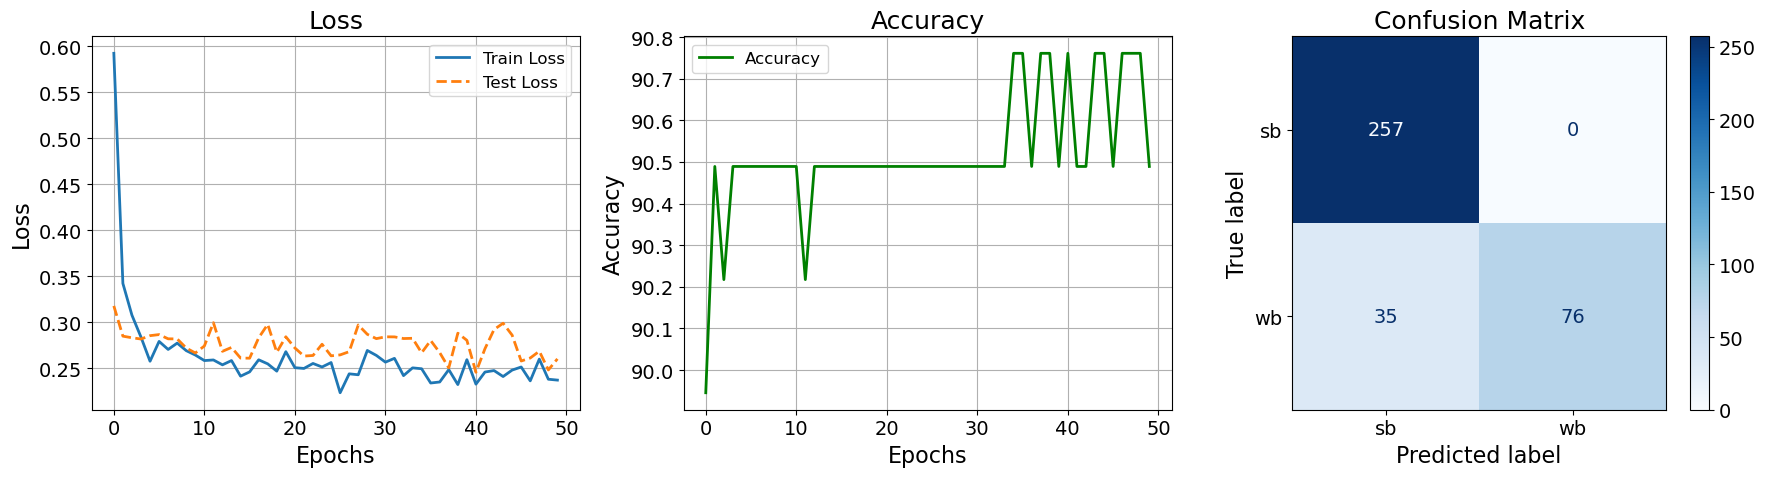

In [24]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from data_utils import prepare_data, PatchDataset
from model import *
from train import train_model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


data, labels = prepare_data(weak_patches, strong_patches)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

train_dataset = PatchDataset(X_train, y_train)
test_dataset = PatchDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

patch_size = weak_patches.shape[1:] 
model = CNN(patch_size).to(device)

train_losses, test_losses, accuracies, all_confusion_matrices = train_model(
    model, train_loader, test_loader, device, num_epochs=50, lr=0.001
)

torch.save(model.state_dict(), "cnn_model.pth")

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(18, 5))

plt.rcParams.update({'font.size': 14, 'axes.labelsize': 16, 'axes.titlesize': 18, 'legend.fontsize': 12})

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(test_losses, label='Test Loss', linewidth=2, linestyle='--')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(accuracies, label='Accuracy', linewidth=2, color='green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid(True)

plt.subplot(1, 3, 3)
final_cm = all_confusion_matrices[-1]
labels = ['sb', 'wb']
ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=labels).plot(
    cmap="Blues", ax=plt.gca(), colorbar=True
)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from rocking_curve import load_edf_images, extract_patches, reconstruct_image_with_background, normalize_image
from model import CNN

device = torch.device("cuda" if torch.cuda.is_available() else "CPU")


#directory = "/home/esrf/benhadji/dfxm-go-ml/ex_data/"
#dfxm-go-ml/ex_data/Z_local_rocking_2x_05_0000.edf
directory = "/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_50/"
#directory = '/data/projects/engage_id03/Al_1050/Al_1050_10x_rockinglayers/scan0044/'
#directory = '/data/projects/engage_id03/STO_indent_1down_rocking/scan0001/'
pat = directory + "Al_111_rockinglayer_{scan:02d}_{i:04d}.edf"
#pat = directory + "Z_local_rocking_2x_{scan:02d}_{i:04d}.edf"
# Load all images
#images = load_images(directory)
#images = dataset
images = load_edf_images(directory,pat, scan=50,nb=31)
#images = process_images(images)

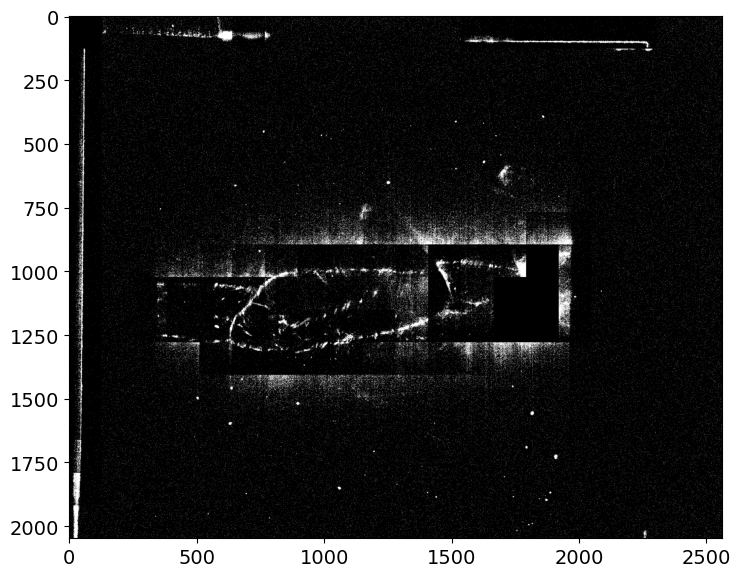

In [28]:

import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from rocking_curve import load_edf_images, extract_patches, reconstruct_image_with_background, normalize_image
from model import CNN

device = torch.device("cuda" if torch.cuda.is_available() else "CPU")


directory = "/home/esrf/benhadji/dfxm-go-ml/ex_data/"
pat = directory + "Z_local_rocking_2x_{scan:02d}_{i:04d}.edf"
#directory = "/data/projects/engage_id03/S1_590A_Al_200_ff_saturday/Al_111_rockinglayer_18/"
#pat = directory + "Al_111_rockinglayer_{scan:02d}_{i:04d}.edf"

images = load_edf_images(directory, pat, scan=0o5, nb=11)

patch_size = (128, 128)

all_patches = []
shapes = []

for img in images:
    patches, img_shape = extract_patches(img, patch_size)
    all_patches.append(patches)
    shapes.append(img_shape)

all_patches_flat = np.concatenate([patches.reshape(-1) for patches in all_patches])
mean = all_patches_flat.mean()
std = all_patches_flat.std()

model = CNN(patch_size)
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
model = model.to(device)
model.eval()

def classify_patches(patches, model, mean, std, device):
    classified_labels = []
    for patch in patches:
        patch = (patch - mean) / std
        patch_tensor = torch.tensor(patch, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(patch_tensor)
            _, predicted = torch.max(output, 1)
            classified_labels.append(predicted.item())
    return classified_labels

classified_patches = []
for patches in all_patches:
    labels = classify_patches(patches, model, mean, std, device)
    classified_patches.append(labels)

mean_intensity = np.mean([np.mean(patch) for frame in all_patches for patch in frame])

reconstructed_images = []
for patches, labels, shape in zip(all_patches, classified_patches, shapes):
    reconstructed_img = reconstruct_image_with_background(patches, labels, shape, patch_size, mean_intensity)
    
    bg_mean = np.mean(reconstructed_img)
    bg_std = np.std(reconstructed_img)
    background_subtracted = reconstructed_img - (bg_mean + bg_std)
    background_subtracted[background_subtracted < 0] = 0

    p_max = np.percentile(background_subtracted, 98)
    if p_max > 0:
        background_subtracted /= p_max
        background_subtracted[background_subtracted > 1] = 1

    reconstructed_images.append(background_subtracted)

summed_image = np.sum(reconstructed_images, axis=0)

p_max = np.percentile(summed_image, 99)
if p_max > 0:
    final_image = summed_image / p_max
    final_image[final_image > 1] = 1
else:
    final_image = summed_image


threshold = 0.6
binary_image = final_image > threshold

plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')
plt.axis('on')
plt.tight_layout()
plt.savefig("rocking_layer.png", dpi=200, bbox_inches='tight')
plt.show()


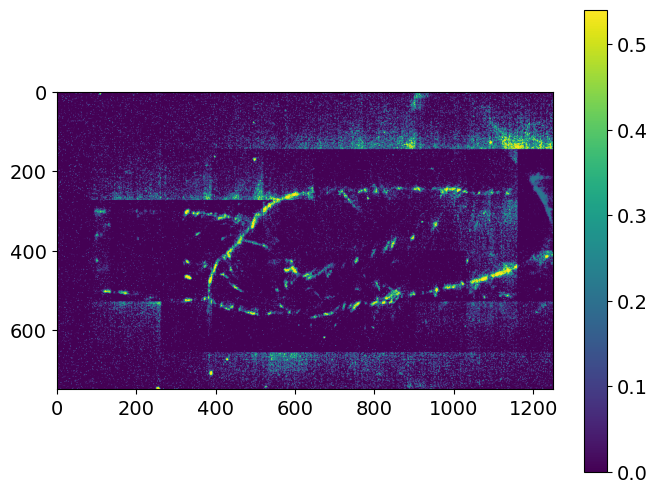

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# ROI
x_start, x_end = 250, 1500
y_start, y_end = 750, 1500

roi = final_image[y_start:y_end, x_start:x_end]

mean_intensity = np.mean(roi)
std_intensity = np.std(roi)

background_level = mean_intensity + std_intensity
image_no_background = final_image - background_level

image_no_background = np.clip(image_no_background, 0, None)

plt.figure(figsize=(8, 6))
plt.imshow(image_no_background[y_start:y_end, x_start:x_end], cmap='viridis')
plt.colorbar()
plt.show()


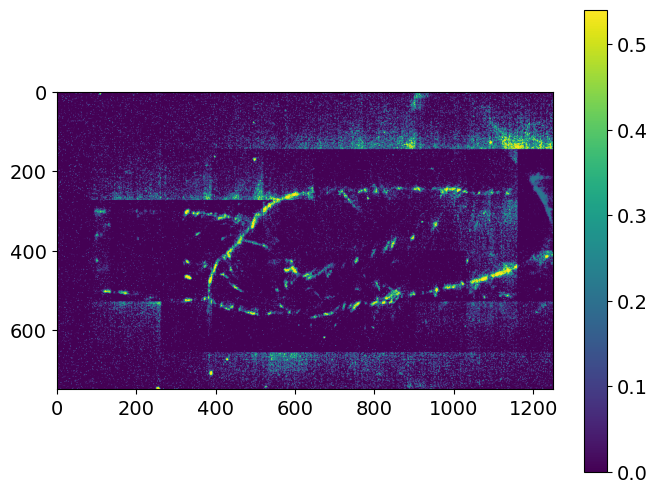

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x_start, x_end = 250, 1500
y_start, y_end = 750, 1500

roi = final_image[y_start:y_end, x_start:x_end]

mean_intensity = np.mean(roi)
std_intensity = np.std(roi)

background_level = mean_intensity + std_intensity
image_no_background = final_image - background_level

image_no_background = np.clip(image_no_background, 0, None)

roi_processed = image_no_background[y_start:y_end, x_start:x_end]

vmin = np.percentile(roi_processed, 1)
vmax = np.percentile(roi_processed, 99)

plt.figure(figsize=(8, 6))
plt.imshow(roi_processed, cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()


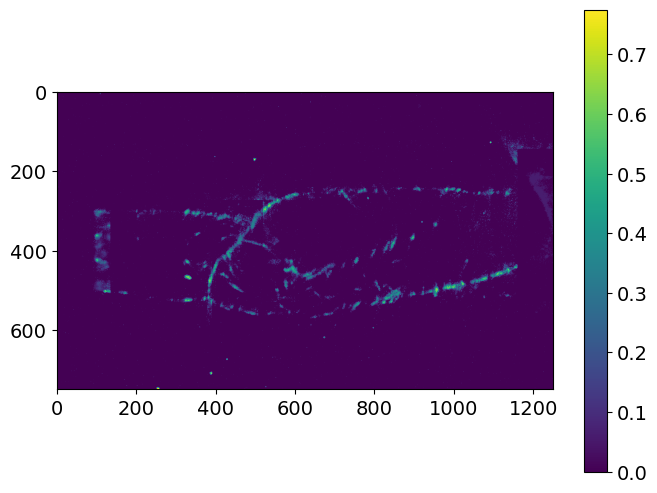

In [26]:
import numpy as np
import matplotlib.pyplot as plt


x_start, x_end = 250, 1500
y_start, y_end = 750, 1500

roi = final_image[y_start:y_end, x_start:x_end]

percentile_value = np.percentile(roi, 95)  

background_level = percentile_value
image_no_background = final_image - background_level

image_no_background = np.clip(image_no_background, 0, None)

plt.figure(figsize=(8, 6))
plt.imshow(image_no_background[y_start:y_end, x_start:x_end], cmap='viridis')
plt.colorbar()
plt.show()
